In [37]:
from pathlib import Path
from ultralytics import YOLO
from ultralytics.engine.results import Results
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from math import ceil

In [38]:
model_path = Path.cwd().parent/'models'/'my_model.pt'
model = YOLO(model_path)

In [39]:

test_img = Path.cwd().parent/'data'/'test'/'test_img.jpg'
pred = model.predict(test_img)


image 1/1 /Users/scontrerasr/shelf-scanner-1/data/test/test_img.jpg: 640x480 2 Bateria Duracell AA 2Unds, 1 Bateria Duracell AAA 2Und, 1 Bateria Energizer A23 2Und, 1 Bateria Energizer Max 9V, 2 Bateria Energizer Max AA 2Unds, 1 Bateria Energizer Max AA 4 Und, 2 Bateria Energizer Max AAA 2 Unds, 2 Bateria Energizer Max AAA 4 Unds, 1 Bateria Energizer Max C 2 Und, 1 Bateria Energizer Max D Alkalina 2 Und, 1 Bateria Kodak 9V EHD, 2 Bateria Philips Boton Litio 2032 X5s, 3 Bateria Philips Power Alkaline AA 2Unds, 3 Bateria Philips Power Alkaline AAA 2Unds, 1 Linterna Rayovac Recargable Mini 5 Led, 71.2ms
Speed: 1.6ms preprocess, 71.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


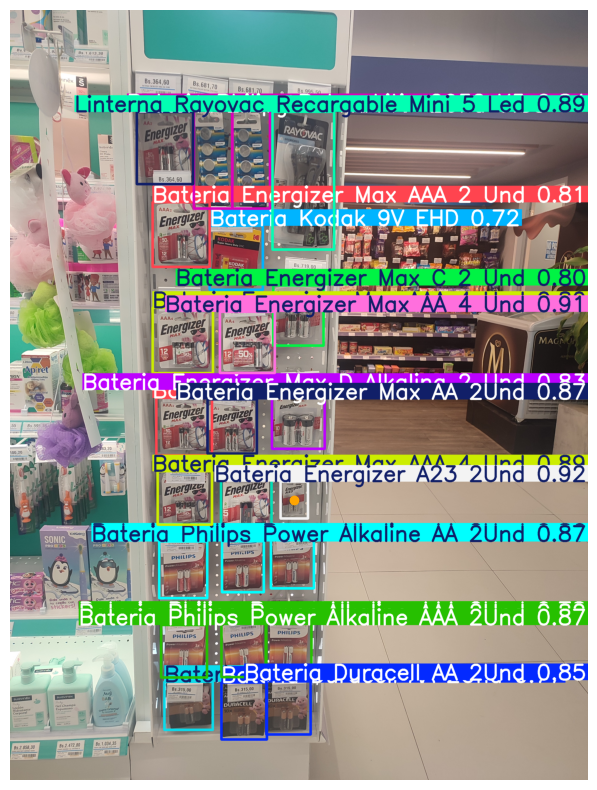

In [40]:
point = pred[0].boxes.xywh[0]

orig_img = (pred[0]).plot()
img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(10,10))

plt.scatter(point[0], point[1], c='orange')

plt.imshow(img)
plt.axis('off')
plt.show()


In [41]:
def getcoor(string):
    string2 = string.split('\n')

    string3 = [strn.split(' ') for strn in string2]
    for j, vec in enumerate(string3):
        for i, val in enumerate(vec):
            string3[j][i] = float(val)
    df = pd.DataFrame(string3, columns=['class','x','y','w','h'])
    df['position_id'] = list(range(df.shape[0]))
    
    return df

correct_labels = """14 0.7629699248120301 0.12706766917293233 0.23571428571428585 0.1819548872180451
11 0.45488721804511273 0.1037593984962406 0.12406015037593981 0.12932330827067667
11 0.5913533834586466 0.10225563909774436 0.09924812030075181 0.12030075187969928
4 0.2894736842105263 0.10451127819548872 0.20676691729323304 0.09473684210526315
6 0.2853383458646616 0.2157894736842105 0.2150375939849624 0.09473684210526315
10 0.5499999997437552 0.2142857142857143 0.21503759398496236 0.08872180451127817
7 0.2894736842105263 0.32631578947368417 0.23157894736842105 0.09624060150375939
5 0.5458646775413073 0.32330827067669177 0.23157894736842105 0.09624060150375939
8 0.7650376234531041 0.32180451127819554 0.23157894736842105 0.09624060150375939
9 0.777443639259432 0.43458646616541347 0.23157894736842105 0.09624060150375939
6 0.28947368421052644 0.4300751879699247 0.23157894736842105 0.09624060150375939
4 0.5500000161434169 0.4300751879699247 0.23157894736842105 0.09624060150375939
7 0.30187970001685466 0.5413533834586465 0.23157894736842105 0.09624060150375939
10 0.5500000161434169 0.5398496240601502 0.23157894736842105 0.09624060150375939
2 0.7650376234531044 0.5375939849624057 0.16541352973467072 0.08872180451127828
12 0.29360902281263634 0.6548872180451124 0.2067669157557644 0.10075187969924831
12 0.5500000161434173 0.6563909774436086 0.2067669157557644 0.10075187969924831
12 0.7650376234531043 0.6533834586466163 0.2067669157557644 0.10075187969924831
13 0.29774436141474553 0.7616541353383457 0.2067669157557644 0.10075187969924831
13 0.5541353547455264 0.7646616541353382 0.2067669157557644 0.10075187969924831
13 0.7650376234531043 0.7631578947368419 0.2067669157557644 0.10075187969924831
1 0.2894736842105267 0.889473684210526 0.2067669157557644 0.10075187969924831
0 0.5458646775413076 0.8864661654135335 0.2067669157557644 0.10075187969924831
0 0.8022556708720886 0.889473684210526 0.2067669157557644 0.10075187969924831"""

base_order_matrix = getcoor(correct_labels)
base_order_matrix.x = StandardScaler().fit_transform(base_order_matrix[['x']])
base_order_matrix.y = StandardScaler().fit_transform(base_order_matrix[['y']])
position_finder = KNeighborsClassifier(n_neighbors=1)
position_finder.fit(base_order_matrix[['x','y']], base_order_matrix.position_id)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [42]:
class_dic = {
    0: "Bateria Duracell AA 2Und",
    1: "Bateria Duracell AAA 2Und",
    2: "Bateria Energizer A23 2Und",
    3: "Bateria Energizer Max 9V",
    4: "Bateria Energizer Max AA 2Und",
    5: "Bateria Energizer Max AA 4 Und",
    6: "Bateria Energizer Max AAA 2 Und",
    7: "Bateria Energizer Max AAA 4 Und",
    8: "Bateria Energizer Max C 2 Und",
    9: "Bateria Energizer Max D Alkalina 2 Und",
    10: "Bateria Kodak 9V EHD",
    11: "Bateria Philips Boton Litio 2032 X5",
    12: "Bateria Philips Power Alkaline AA 2Und",
    13: "Bateria Philips Power Alkaline AAA 2Und",
    14: "Linterna Rayovac Recargable Mini 5 Led"
}

In [43]:
def preprocess_result_boxes(df: pd.DataFrame):
    scaler = StandardScaler()
    df.x = scaler.fit_transform(df[['x']])
    df.y = scaler.fit_transform(df[['y']])
    
    return df

In [44]:
def parse_result(result:Results):
    df = pd.DataFrame(result.boxes.xywh, columns=['x', 'y', 'w', 'h'])
    df = preprocess_result_boxes(df)
    df['class'] = result.boxes.cls
    df['position_id'] = position_finder.predict(df[['x', 'y']])
    return df[['class', 'x', 'y', 'w', 'h', 'position_id']]

pred_df = parse_result(pred[0])
pred_df

,class,x,y,w,h,position_id
0,2.0,1.271600,0.296492,142.162842,192.582031,14
1,5.0,0.238510,-0.553533,284.825439,318.307495,7
2,14.0,1.472105,-1.425947,319.902466,715.811340,0
3,7.0,-1.136760,0.284956,282.340454,277.463623,12
4,4.0,-1.573885,-1.601784,291.807190,375.108948,3
5,13.0,-1.153266,1.111863,237.202087,272.841553,18
6,4.0,-0.093252,-0.100043,255.481812,281.691040,11
7,12.0,-1.172348,0.672932,248.469971,295.480957,15
8,12.0,1.233214,0.641227,222.847656,254.682373,17
9,12.0,0.144101,0.656586,216.705933,264.697266,16


In [54]:
conteo_productos_anaquel = base_order_matrix['class'].value_counts()
list_cont_1=pd.DataFrame(conteo_productos_anaquel)
list_cont_1['product_name'] = list_cont.index.map(class_dic)
list_cont_1.set_index('product_name', inplace=True)
print(list_cont_1)

                                         count
product_name                                  
Bateria Philips Power Alkaline AA 2Und       3
Bateria Philips Power Alkaline AAA 2Und      3
Bateria Philips Boton Litio 2032 X5          2
Bateria Energizer Max AA 2Und                2
Bateria Energizer Max AAA 2 Und              2
Bateria Kodak 9V EHD                         2
Bateria Energizer Max AAA 4 Und              2
Bateria Duracell AA 2Und                     2
Linterna Rayovac Recargable Mini 5 Led       1
Bateria Energizer Max AA 4 Und               1
Bateria Energizer Max C 2 Und                1
Bateria Energizer Max D Alkalina 2 Und       1
Bateria Energizer A23 2Und                   1
Bateria Duracell AAA 2Und                    1


In [45]:
conteo_productos = pred_df['class'].value_counts()
list_cont=pd.DataFrame(conteo_productos)
list_cont['product_name'] = list_cont.index.map(class_dic)
list_cont.set_index('product_name', inplace=True)
print(list_cont)
#esto se muestra en el output final


                                         count
product_name                                  
Bateria Philips Power Alkaline AAA 2Und      3
Bateria Philips Power Alkaline AA 2Und       3
Bateria Energizer Max AAA 4 Und              2
Bateria Energizer Max AA 2Und                2
Bateria Duracell AA 2Und                     2
Bateria Philips Boton Litio 2032 X5          2
Bateria Energizer Max AAA 2 Und              2
Bateria Energizer A23 2Und                   1
Bateria Energizer Max AA 4 Und               1
Linterna Rayovac Recargable Mini 5 Led       1
Bateria Energizer Max D Alkalina 2 Und       1
Bateria Energizer Max C 2 Und                1
Bateria Energizer Max 9V                     1
Bateria Duracell AAA 2Und                    1
Bateria Kodak 9V EHD                         1


In [ ]:
#comparar las dos cuentas y hacer una lista de falsos en cantidad de cara para el mensaje final

In [46]:
def get_matches(base_df:pd.DataFrame, pred_df:pd.DataFrame):
    def check_item(row):
        row = row[['class','position_id']]
        return (pred_df[['class','position_id']] == row).all(axis=1).any()

    return base_df.apply(check_item, axis=1)
get_matches(base_order_matrix, pred_df)

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13    False
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
dtype: bool

In [47]:
def get_comparison(pred_df):
    comparison_df = base_order_matrix[['class','position_id']].copy()
    comparison_df['SKU'] = comparison_df['class'].map(class_dic)
    comparison_df['matches'] = get_matches(base_order_matrix, pred_df)

    return comparison_df

get_comparison(pred_df)

,class,position_id,SKU,matches
0,14.0,0,Linterna Rayovac Recargable Mini 5 Led,True
1,11.0,1,Bateria Philips Boton Litio 2032 X5,True
2,11.0,2,Bateria Philips Boton Litio 2032 X5,True
3,4.0,3,Bateria Energizer Max AA 2Und,True
4,6.0,4,Bateria Energizer Max AAA 2 Und,True
5,10.0,5,Bateria Kodak 9V EHD,True
6,7.0,6,Bateria Energizer Max AAA 4 Und,True
7,5.0,7,Bateria Energizer Max AA 4 Und,True
8,8.0,8,Bateria Energizer Max C 2 Und,True
9,9.0,9,Bateria Energizer Max D Alkalina 2 Und,True


esto se muestra en el output final:
imagen procesada
cantidad de caras
% de orden final
mensaje: Falta ordenar estos productos: lista = false
mensaje: Faltan caras estos productos: caras != imagen test